**This notebook created and pickled:**
- artist_df.pkl
- artist_class_count_df.pkl
- songs_df.pkl
- song_class_count_df.pkl
- class_type_reorg_df.pkl
- new_class_types_with_artists.pkl

**In further iterations, would like to condense/combine these into one file that you can reference and pull dfs into new notebook**

This notebook works on data discovery of the Peloton dataset in more detail. It also plays with joins and experimental creation of the data available.

Any section that took a longer processing time have been hashed out. Unhashed and running this full notebook would give the dataset worked with in the proceeding notebooks.

Along the way you will see my "notes to self" - these are ideas and questions that came up as I went through data discovery and I have left them in here for returning in future iterations. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import operator

import pickle

In [3]:
# import peloton data
df = pd.read_excel('../../../data/original_datasets/AGF_Peloton Classes March.xlsx')
df.head()

,classId,className,classDescription,classDifficulty,classDuration,classType,classLength,classLocation,classOriginalAirdate,classRating,classRatingCount,instructorName,instructorBio,classEquipment,classSongs,classArtists,classUrl
0,7f66378211c9476b9b5619bf989f91d0,20 min Peace Meditation,A guided meditation that focuses on cultivatin...,4.3333,20,Meditation,23,psny-studio-2,2021-09-03 13:25:00,0.9847,131,Aditi Shah,"To Aditi, yoga goes beyond movement and can br...",Yoga Block,Meditation 22,RIOPY,https://members.onepeloton.com/classes/bootcam...
1,54ac61803b364b2fa8378acd9f593cdb,15 min Bodyweight Strength,"No equipment, no problem. Join us for a high-e...",5.7755,15,Strength,19,psny-studio-3,2021-09-03 13:19:00,0.9933,297,Olivia Amato,"Born and raised in New York, Olivia grew up pl...",Workout Mat,"California Gurls,Let's Get Loud,Let It Rock (f...","Katy Perry,Snoop Dogg,Jennifer Lopez,Kevin Rud...",https://members.onepeloton.com/classes/bootcam...
2,c75fd4831573483c9d45739aae11d083,20 min Focus Flow: Lower Body,This yoga flow class focuses on poses that eng...,4.3664,20,Yoga,23,psny-studio-2,2021-09-03 12:51:00,1.0000,159,Aditi Shah,"To Aditi, yoga goes beyond movement and can br...","Yoga Blanket,Yoga Block,Yoga Mat","Interlude No 1,Oceansize,She Just Likes To Fig...","James Vincent McMorrow,Oh Wonder,Four Tet,Grim...",https://members.onepeloton.com/classes/bootcam...
3,470086936f7a4723ab5a53cb80b571ff,45 min Pop Bootcamp,Split your workout 50/50 between cardio on the...,7.8312,45,Tread Bootcamp,50,psny-studio-4,2021-09-03 11:56:00,0.9737,152,Olivia Amato,"Born and raised in New York, Olivia grew up pl...","Workout Mat,Medium Weights",34+35 (Remix) (feat. Doja Cat & Megan Thee Sta...,"Ariana Grande,Doja Cat,Megan Thee Stallion,Jus...",https://members.onepeloton.com/classes/bootcam...
4,9680a817bf2149d2b91990c87166a400,20 min Pop Ride,We dare you not to dance as you ride to all th...,7.4000,20,Cycling,24,uk,2021-09-03 07:52:00,1.0000,82,Sam Yo,Sam is a pro at many things but shines when it...,None,"Señorita,Marry You,Irreplaceable,What Do You M...","Justin Timberlake,Bruno Mars,Beyoncé,Justin Bi...",https://members.onepeloton.com/classes/bootcam...


Note: Keep in mind Peloton scrubs their classes a few times a year (instructors leaving, probably low stream count?)

In [327]:
# overview
df.info()
# Instructor bios have some nulls 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16892 entries, 0 to 16891
Data columns (total 17 columns):
classId                 16892 non-null object
className               16892 non-null object
classDescription        16892 non-null object
classDifficulty         16892 non-null float64
classDuration           16892 non-null int64
classType               16892 non-null object
classLength             16892 non-null int64
classLocation           16892 non-null object
classOriginalAirdate    16892 non-null object
classRating             16892 non-null float64
classRatingCount        16892 non-null int64
instructorName          16892 non-null object
instructorBio           16883 non-null object
classEquipment          16892 non-null object
classSongs              16892 non-null object
classArtists            16892 non-null object
classUrl                16892 non-null object
dtypes: float64(2), int64(3), object(12)
memory usage: 2.2+ MB


In [328]:
df[df['instructorBio'].isna()]
# Null instructor bios are those that have multiple instructors
# Drop these

,classId,className,classDescription,classDifficulty,classDuration,classType,classLength,classLocation,classOriginalAirdate,classRating,classRatingCount,instructorName,instructorBio,classEquipment,classSongs,classArtists,classUrl
5579,1f16b299fe0041a6a6d42c1ca8c6031c,45 min All For One More Ride,We’re coming together in unity as one team. Cl...,8.3567,45,Cycling,48,psny-studio-1,2020-02-07 13:00:00,0.9937,107629,Multiple Instructors,NaN,None,"Forever,Fight Song,People Like Us (DEION Remix...","Labrinth,Rachel Platten,Kelly Clarkson,Jess Gl...",https://members.onepeloton.com/classes/bootcam...
5581,492ae8d4f17047a391f2140c1865af0d,30 min All For One Run,We’re coming together in unity as one team. La...,7.2215,30,Running,34,psny-studio-4,2020-02-07 13:00:00,0.9941,22609,Multiple Instructors,NaN,None,"Higher Love,Battle Scars,Feel the Love (feat. ...","Kygo,Whitney Houston,Lupe Fiasco,Guy Sebastian...",https://members.onepeloton.com/classes/bootcam...
5582,67a61f9b09604a6fb90c94164ecb0d7c,30 min All For One Strength,We’re coming together in unity as one team. Jo...,7.1887,30,Strength,34,psny-studio-4,2020-02-07 13:00:00,0.9956,34397,Multiple Instructors,NaN,"Workout Mat,Medium Weights","Stand By Me,Get Together,Good Vibrations,Unsto...","Florence + The Machine,Florence + The Machine,...",https://members.onepeloton.com/classes/bootcam...
5583,bb3874389bf84a72a80dee2ecec15a45,45 min All For One Ride,We’re coming together in unity as one team. Cl...,8.0284,45,Cycling,48,psny-studio-1,2020-02-07 13:00:00,0.9881,134299,Multiple Instructors,NaN,None,"What's Going On,Shine (Matrix & Futurebound Re...","Marvin Gaye,Emeli Sandé,Lenny Kravitz,Bob Sinc...",https://members.onepeloton.com/classes/bootcam...
6712,dcf96255752145aeb8058a0a8e2d06f7,30 min Two for One: WHM Celebration Ride,"Two Instructors, one ride! Celebrate the unsto...",7.4966,30,Cycling,33,uk,17/03/2020 10:50,0.9723,21458,Hannah & Leanne,NaN,None,"I'm Every Woman (C + C Club Mix Radio Edit),Po...","Whitney Houston,Little Mix,Stormzy,Ryan Riback...",https://members.onepeloton.com/classes/bootcam...
7167,87369c19e4394f20917a5c514cfaf45b,60 min Two for One: BHM Bootcamp,"Two instructors, one bootcamp! Celebrate Black...",7.7932,60,Tread Bootcamp,63,nyc-gw-tread,29/02/2020 15:46,0.9934,5463,Chase & Jess,NaN,"Workout Mat,Light Weights,Medium Weights",New York (Album Version (Edited)) (feat. Fat J...,"Ja Rule,Fat Joe,Jadakiss,Joe,Big Pun,J.O.E,Bus...",https://members.onepeloton.com/classes/bootcam...
8454,aabb2596103a43768e0c40505f09029d,60 min Two for One: Power Zone Ride,"Two instructors, one ride! Max out the effecti...",8.2662,60,Cycling,64,nyc,18/01/2020 17:52,0.9949,50272,Denis & Matt,NaN,None,(If You're Wondering If I Want You To) I Want ...,"Weezer,Bush,Gryffin,Sinead Harnett,Usher,Pitbu...",https://members.onepeloton.com/classes/bootcam...
8715,d0a382932fc34f9098c096f2aadcef6e,30 min Two for One: Groove Ride,"Two instructors, one ride! In this choreograph...",7.5517,30,Cycling,33,nyc,2020-10-01 01:18:00,0.9904,81349,Cody & Emma,NaN,None,Love Will Never Do (Without You) (Single Versi...,"Janet Jackson,Keys N Krates,Britney Spears,Mad...",https://members.onepeloton.com/classes/bootcam...
11141,a0f86269bd594c8599b8b64ae4e375fa,30 min JLO Ride,Join Robin and Jess for the first ever Artist ...,7.9813,30,Cycling,33,nyc,15/10/2019 21:47,0.9876,87734,Jess & Robin,NaN,None,"Love Don't Cost a Thing,Play (Radio Edit),Let'...","Jennifer Lopez,Jennifer Lopez,Jennifer Lopez,J...",https://members.onepeloton.com/classes/bootcam...


In [329]:
df.describe()
# classDuration is in title of class 20, 30, etc
# classLength is longer than classDuration?

,classDifficulty,classDuration,classLength,classRating,classRatingCount
count,16892.000000,16892.000000,16892.000000,16892.000000,16892.000000
mean,6.643653,25.339214,28.338148,0.989243,11489.512254
std,1.758366,13.701587,14.123386,0.010464,18861.688968
min,1.699300,5.000000,6.000000,0.765400,1.000000
25%,5.644975,15.000000,18.000000,0.987100,2472.500000
50%,7.196600,20.000000,24.000000,0.992100,5971.000000
75%,8.030550,30.000000,34.000000,0.995000,13305.000000
max,9.805300,90.000000,93.000000,1.000000,621097.000000


In [330]:
df[[c for c in df.columns if df[c].dtype == 'object']].describe()
# Most common class type is "30 min Intervals & Arms Ride"
# Most common class description is yoga though (means yoga classes have standardized description versus cyclling)
# If they all were standardized, then description would match to "30 min Intervals & Arms Ride"
# 44% of classes are cycling
# 22.5% classes filmed in nyc (instructors in nyc) - look at unique values here - MUCH MORE THAN 22%. There
# are multiple values for nyc (Acutually closer to 85% when take out UK and remote - prob also NYC)
# Aditi Shah has most classes. She teaches Yoga and Meditation (4 strength classes also included)
# Instructor bio matches instructor name
# 54% of classes need no eqiupment (mostly cycling and running - no equipment beyond bike...)
# 134 classes have no classSongs or Artists (should cut these)

,classId,className,classDescription,classType,classLocation,classOriginalAirdate,instructorName,instructorBio,classEquipment,classSongs,classArtists,classUrl
count,16892,16892,16892,16892,16892,16892,16892,16883,16892,16892,16892,16892
unique,16892,1964,2430,10,16,15204,48,40,50,16168,16097,16892
top,f4a866541edc4196811d80030b4c7ba9,30 min Intervals & Arms Ride,"In this active, vinyasa-style yoga class, we’l...",Cycling,nyc,18/07/2019 15:00,Aditi Shah,"To Aditi, yoga goes beyond movement and can br...",None,None,None,https://members.onepeloton.com/classes/bootcam...
freq,1,355,564,7498,3816,23,793,793,9207,134,134,1


In [331]:
df['classLocation'].value_counts()

nyc                         3816
nyc-gw-tread                2967
uk                          2175
nyc-int-flex                2139
psny-studio-1               1969
psny-studio-4               1497
psny-studio-2               1357
psny-studio-3                525
nyc_audiobooth                97
us-bike-remote-broadcast      86
uk-strength                   66
uk-bike-remote-broadcast      57
btr-remote-broadcast          49
tread-remote-broadcast        46
yoga-remote-broadcast         44
event-01                       2
Name: classLocation, dtype: int64

In [332]:
df[df['instructorName']=='Aditi Shah']['classType'].value_counts()

Yoga          470
Meditation    319
Strength        4
Name: classType, dtype: int64

In [333]:
df[df['classEquipment']=='None']['classType'].value_counts()
# When classEquipment is none, it could still mean you need the bike
# populate cycling classes with Bike

Cycling           6254
Running           1989
Walking            416
Stretching         214
Meditation         178
Yoga                93
Strength            24
Tread Bootcamp      24
Cardio              14
Bike Bootcamp        1
Name: classType, dtype: int64

In [334]:
df[df['instructorBio'].isna()]

,classId,className,classDescription,classDifficulty,classDuration,classType,classLength,classLocation,classOriginalAirdate,classRating,classRatingCount,instructorName,instructorBio,classEquipment,classSongs,classArtists,classUrl
5579,1f16b299fe0041a6a6d42c1ca8c6031c,45 min All For One More Ride,We’re coming together in unity as one team. Cl...,8.3567,45,Cycling,48,psny-studio-1,2020-02-07 13:00:00,0.9937,107629,Multiple Instructors,NaN,None,"Forever,Fight Song,People Like Us (DEION Remix...","Labrinth,Rachel Platten,Kelly Clarkson,Jess Gl...",https://members.onepeloton.com/classes/bootcam...
5581,492ae8d4f17047a391f2140c1865af0d,30 min All For One Run,We’re coming together in unity as one team. La...,7.2215,30,Running,34,psny-studio-4,2020-02-07 13:00:00,0.9941,22609,Multiple Instructors,NaN,None,"Higher Love,Battle Scars,Feel the Love (feat. ...","Kygo,Whitney Houston,Lupe Fiasco,Guy Sebastian...",https://members.onepeloton.com/classes/bootcam...
5582,67a61f9b09604a6fb90c94164ecb0d7c,30 min All For One Strength,We’re coming together in unity as one team. Jo...,7.1887,30,Strength,34,psny-studio-4,2020-02-07 13:00:00,0.9956,34397,Multiple Instructors,NaN,"Workout Mat,Medium Weights","Stand By Me,Get Together,Good Vibrations,Unsto...","Florence + The Machine,Florence + The Machine,...",https://members.onepeloton.com/classes/bootcam...
5583,bb3874389bf84a72a80dee2ecec15a45,45 min All For One Ride,We’re coming together in unity as one team. Cl...,8.0284,45,Cycling,48,psny-studio-1,2020-02-07 13:00:00,0.9881,134299,Multiple Instructors,NaN,None,"What's Going On,Shine (Matrix & Futurebound Re...","Marvin Gaye,Emeli Sandé,Lenny Kravitz,Bob Sinc...",https://members.onepeloton.com/classes/bootcam...
6712,dcf96255752145aeb8058a0a8e2d06f7,30 min Two for One: WHM Celebration Ride,"Two Instructors, one ride! Celebrate the unsto...",7.4966,30,Cycling,33,uk,17/03/2020 10:50,0.9723,21458,Hannah & Leanne,NaN,None,"I'm Every Woman (C + C Club Mix Radio Edit),Po...","Whitney Houston,Little Mix,Stormzy,Ryan Riback...",https://members.onepeloton.com/classes/bootcam...
7167,87369c19e4394f20917a5c514cfaf45b,60 min Two for One: BHM Bootcamp,"Two instructors, one bootcamp! Celebrate Black...",7.7932,60,Tread Bootcamp,63,nyc-gw-tread,29/02/2020 15:46,0.9934,5463,Chase & Jess,NaN,"Workout Mat,Light Weights,Medium Weights",New York (Album Version (Edited)) (feat. Fat J...,"Ja Rule,Fat Joe,Jadakiss,Joe,Big Pun,J.O.E,Bus...",https://members.onepeloton.com/classes/bootcam...
8454,aabb2596103a43768e0c40505f09029d,60 min Two for One: Power Zone Ride,"Two instructors, one ride! Max out the effecti...",8.2662,60,Cycling,64,nyc,18/01/2020 17:52,0.9949,50272,Denis & Matt,NaN,None,(If You're Wondering If I Want You To) I Want ...,"Weezer,Bush,Gryffin,Sinead Harnett,Usher,Pitbu...",https://members.onepeloton.com/classes/bootcam...
8715,d0a382932fc34f9098c096f2aadcef6e,30 min Two for One: Groove Ride,"Two instructors, one ride! In this choreograph...",7.5517,30,Cycling,33,nyc,2020-10-01 01:18:00,0.9904,81349,Cody & Emma,NaN,None,Love Will Never Do (Without You) (Single Versi...,"Janet Jackson,Keys N Krates,Britney Spears,Mad...",https://members.onepeloton.com/classes/bootcam...
11141,a0f86269bd594c8599b8b64ae4e375fa,30 min JLO Ride,Join Robin and Jess for the first ever Artist ...,7.9813,30,Cycling,33,nyc,15/10/2019 21:47,0.9876,87734,Jess & Robin,NaN,None,"Love Don't Cost a Thing,Play (Radio Edit),Let'...","Jennifer Lopez,Jennifer Lopez,Jennifer Lopez,J...",https://members.onepeloton.com/classes/bootcam...


In [335]:
df[df['classArtists']=='None']['classType'].value_counts()
# Null classArtists means playlist isn't documented. Consider dirty and drop rows

Cycling           82
Meditation        14
Strength          12
Running            7
Cardio             6
Yoga               6
Tread Bootcamp     3
Stretching         2
Walking            2
Name: classType, dtype: int64

#### Drop Nulls and light cleaning

TO DOs:
- Drop null 'instructorBio' rows - only 9
- Drop rows with null classSongs/classArtists - count match 134
- Populate rows with classType Cycling and classEquipment None to classEquipment = Bike



In [336]:
# Drop null 'instructorBio' rows - only 9
df = df[df['instructorBio'].notna()]

In [337]:
# Drop rows with null classArtists - count match 134
df = df[df['classArtists'] != 'None']

In [338]:
# Drop rows with null classSongs - count match 134
df[df['classSongs'].isnull()]

,classId,className,classDescription,classDifficulty,classDuration,classType,classLength,classLocation,classOriginalAirdate,classRating,classRatingCount,instructorName,instructorBio,classEquipment,classSongs,classArtists,classUrl


In [339]:
# Populate rows with classType Cycling and classEquipment None to classEquipment = Bike
df['classEquipment'] = np.where(((df['classType'] == 'Cycling') & (df['classEquipment'] == 'None')),
                                'Bike',df['classEquipment'])

In [340]:
# Check work 
df['classEquipment'].value_counts()

Bike                                                                      6199
None                                                                      2928
Yoga Blanket,Yoga Block,Yoga Mat                                          1630
Light Weights                                                             1558
Workout Mat                                                               1199
Yoga Blanket                                                               697
Heavy Weights,Workout Mat,Medium Weights                                   440
Workout Mat,Medium Weights                                                 421
Workout Mat,Light Weights,Medium Weights                                   339
Yoga Block                                                                 268
Yoga Blanket,Yoga Block,Yoga Strap,Yoga Mat                                210
Yoga Blanket,Yoga Block,Bolster,Yoga Mat                                   154
Workout Mat,Light Weights                           

In [341]:
# What classes still have None - gut check
df[df['classEquipment'] == 'None']['classType'].value_counts()

Running           1981
Walking            414
Stretching         213
Meditation         170
Yoga                92
Tread Bootcamp      24
Strength            24
Cardio               9
Bike Bootcamp        1
Name: classType, dtype: int64

In [342]:
len(df)

16749

In [343]:
df = df[df['classId'] != '8840f82cdc624aa28a5d1babc51a3916']
len(df)

16748

In [344]:
#reset index after drops
df = df.reset_index(drop=True)
df

,classId,className,classDescription,classDifficulty,classDuration,classType,classLength,classLocation,classOriginalAirdate,classRating,classRatingCount,instructorName,instructorBio,classEquipment,classSongs,classArtists,classUrl
0,7f66378211c9476b9b5619bf989f91d0,20 min Peace Meditation,A guided meditation that focuses on cultivatin...,4.3333,20,Meditation,23,psny-studio-2,2021-09-03 13:25:00,0.9847,131,Aditi Shah,"To Aditi, yoga goes beyond movement and can br...",Yoga Block,Meditation 22,RIOPY,https://members.onepeloton.com/classes/bootcam...
1,54ac61803b364b2fa8378acd9f593cdb,15 min Bodyweight Strength,"No equipment, no problem. Join us for a high-e...",5.7755,15,Strength,19,psny-studio-3,2021-09-03 13:19:00,0.9933,297,Olivia Amato,"Born and raised in New York, Olivia grew up pl...",Workout Mat,"California Gurls,Let's Get Loud,Let It Rock (f...","Katy Perry,Snoop Dogg,Jennifer Lopez,Kevin Rud...",https://members.onepeloton.com/classes/bootcam...
2,c75fd4831573483c9d45739aae11d083,20 min Focus Flow: Lower Body,This yoga flow class focuses on poses that eng...,4.3664,20,Yoga,23,psny-studio-2,2021-09-03 12:51:00,1.0000,159,Aditi Shah,"To Aditi, yoga goes beyond movement and can br...","Yoga Blanket,Yoga Block,Yoga Mat","Interlude No 1,Oceansize,She Just Likes To Fig...","James Vincent McMorrow,Oh Wonder,Four Tet,Grim...",https://members.onepeloton.com/classes/bootcam...
3,470086936f7a4723ab5a53cb80b571ff,45 min Pop Bootcamp,Split your workout 50/50 between cardio on the...,7.8312,45,Tread Bootcamp,50,psny-studio-4,2021-09-03 11:56:00,0.9737,152,Olivia Amato,"Born and raised in New York, Olivia grew up pl...","Workout Mat,Medium Weights",34+35 (Remix) (feat. Doja Cat & Megan Thee Sta...,"Ariana Grande,Doja Cat,Megan Thee Stallion,Jus...",https://members.onepeloton.com/classes/bootcam...
4,9680a817bf2149d2b91990c87166a400,20 min Pop Ride,We dare you not to dance as you ride to all th...,7.4000,20,Cycling,24,uk,2021-09-03 07:52:00,1.0000,82,Sam Yo,Sam is a pro at many things but shines when it...,Bike,"Señorita,Marry You,Irreplaceable,What Do You M...","Justin Timberlake,Bruno Mars,Beyoncé,Justin Bi...",https://members.onepeloton.com/classes/bootcam...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16743,a144fcf1595740caa610f6484deb3cdb,20 min Funk Fun Run,This 20 minute Fun Run is a musically driven c...,6.4567,20,Running,23,nyc-gw-tread,14/09/2018 10:22,0.9933,150,Becs Gentry,Becs joins Peloton from London as an accomplis...,None,"Man Funk (feat. Leron Thomas),If It Ain't Funk...","Guts,Leron Thomas,Soopasoul,FDEL,Basement Frea...",https://members.onepeloton.com/classes/bootcam...
16744,bd89a56c884b48e59ce9c43ab4f4d86f,45 min 90s Pop Ride,The 90s were a booming and inventive time in m...,8.1481,45,Cycling,49,nyc,13/09/2018 23:19,0.9925,1877,Denis Morton,"Raised in Florida, schooled in Tennessee, stee...",Light Weights,"Too Close - Radio Edit,Motownphilly - Original...","Next,Boyz II Men,Blues Traveler,Eagle-Eye Cher...",https://members.onepeloton.com/classes/bootcam...
16745,e5a99c83d7fc4f0686c68b02e5932204,10 min Arms Toning,Join Jess as she takes you through this 10-min...,7.4028,10,Strength,11,nyc,13/09/2018 21:02,0.9978,4481,Jess King,Jess is a charismatic instructor with a boundl...,Light Weights,"Hustle,Day and Night,Just Got Paid,Waiting for...","Daphne Willis,Gizzle,Lo Air,Sigala,Ella Eyre,M...",https://members.onepeloton.com/classes/bootcam...
16746,c57e123004d04df1bfae94c5e4399bb3,45 min 90s Ride,The 90s were a booming and inventive time in m...,8.3982,45,Cycling,49,nyc,13/09/2018 11:53,0.9922,2307,Emma Lovewell,Emma Lovewell is a Martha’s Vineyard native an...,Light Weights,"Show Me Love - Radio Version,Don't Speak,Gonna...","Robyn,No Doubt,C & C Music Factory,Technotroni...",https://members.onepeloton.com/classes/bootcam...


In [345]:
# pickle df - done
df.to_pickle("./base_clean_df.pkl")

#### Equipment is list, create Boolean columns for practice (use genres code from project 1)

In [346]:
# Not working...?
# Define function to convert Series values to lists
# def conv_to_list(Series):
#     Series = Series.str.split(',')
#     return Series

In [347]:
# Currently strings, need to convert to lists
df['classEquipment'] = df['classEquipment'].str.split(',')

In [348]:
# Establish variable for Series
class_equip = df['classEquipment']

In [349]:
#Establish empty list to collect all possible equipment types. These will be made into columns
equipment_list = []

# Start with rows in index
for row in class_equip.index:
    # Access the list data type in each row, it will change with every row in the index
    for item in class_equip[row]:
        # append the eqiupment that is taken as an item from the list within the row and add it to the equipment_list
        equipment_list.append(item) 

# Define a set of the equipment_list from the above for loop; reassign the genres_list variable name to this set
class_equipment_list = set(equipment_list)

In [350]:
class_equipment_list

{'Bike',
 'Bolster',
 'Heavy Weights',
 'Light Weights',
 'Medium Weights',
 'None',
 'Resistance Band',
 'Workout Mat',
 'Yoga Blanket',
 'Yoga Block',
 'Yoga Mat',
 'Yoga Strap'}

In [351]:
# Define a new DataFrame for genres to add Boolean columns to
class_equipment_df = pd.DataFrame(df[['classId', 'classEquipment']])

In [352]:
# Use for loop to create columns for each genre in the deduplicated set of genres for the genres_list
for equip in class_equipment_list:
    #create a new column in our new DataFrame
    class_equipment_df[equip] = 0

In [353]:
class_equipment_df

,classId,classEquipment,Resistance Band,Bolster,Bike,Yoga Blanket,Yoga Mat,Light Weights,Yoga Block,None,Workout Mat,Medium Weights,Yoga Strap,Heavy Weights
0,7f66378211c9476b9b5619bf989f91d0,[Yoga Block],0,0,0,0,0,0,0,0,0,0,0,0
1,54ac61803b364b2fa8378acd9f593cdb,[Workout Mat],0,0,0,0,0,0,0,0,0,0,0,0
2,c75fd4831573483c9d45739aae11d083,"[Yoga Blanket, Yoga Block, Yoga Mat]",0,0,0,0,0,0,0,0,0,0,0,0
3,470086936f7a4723ab5a53cb80b571ff,"[Workout Mat, Medium Weights]",0,0,0,0,0,0,0,0,0,0,0,0
4,9680a817bf2149d2b91990c87166a400,[Bike],0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16743,a144fcf1595740caa610f6484deb3cdb,[None],0,0,0,0,0,0,0,0,0,0,0,0
16744,bd89a56c884b48e59ce9c43ab4f4d86f,[Light Weights],0,0,0,0,0,0,0,0,0,0,0,0
16745,e5a99c83d7fc4f0686c68b02e5932204,[Light Weights],0,0,0,0,0,0,0,0,0,0,0,0
16746,c57e123004d04df1bfae94c5e4399bb3,[Light Weights],0,0,0,0,0,0,0,0,0,0,0,0


In [354]:
for row in class_equipment_df.index:
    # Using previous for loop, edit it to access our new DF's column 'genres' THEN the row
    # This will get us to the list of genres in the given row
    for equip in class_equipment_df['classEquipment'][row]:
        # Then say access the column that matches single genre in that list of genres (item) in that row (row)
        class_equipment_df[equip][row] = 1

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [355]:
class_equipment_df

,classId,classEquipment,Resistance Band,Bolster,Bike,Yoga Blanket,Yoga Mat,Light Weights,Yoga Block,None,Workout Mat,Medium Weights,Yoga Strap,Heavy Weights
0,7f66378211c9476b9b5619bf989f91d0,[Yoga Block],0,0,0,0,0,0,1,0,0,0,0,0
1,54ac61803b364b2fa8378acd9f593cdb,[Workout Mat],0,0,0,0,0,0,0,0,1,0,0,0
2,c75fd4831573483c9d45739aae11d083,"[Yoga Blanket, Yoga Block, Yoga Mat]",0,0,0,1,1,0,1,0,0,0,0,0
3,470086936f7a4723ab5a53cb80b571ff,"[Workout Mat, Medium Weights]",0,0,0,0,0,0,0,0,1,1,0,0
4,9680a817bf2149d2b91990c87166a400,[Bike],0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16743,a144fcf1595740caa610f6484deb3cdb,[None],0,0,0,0,0,0,0,1,0,0,0,0
16744,bd89a56c884b48e59ce9c43ab4f4d86f,[Light Weights],0,0,0,0,0,1,0,0,0,0,0,0
16745,e5a99c83d7fc4f0686c68b02e5932204,[Light Weights],0,0,0,0,0,1,0,0,0,0,0,0
16746,c57e123004d04df1bfae94c5e4399bb3,[Light Weights],0,0,0,0,0,1,0,0,0,0,0,0


In [356]:
# No use in having a None column, drop 
class_equipment_df = class_equipment_df.drop(columns='None')

In [357]:
class_equipment_df.columns

Index(['classId', 'classEquipment', 'Resistance Band', 'Bolster', 'Bike',
       'Yoga Blanket', 'Yoga Mat', 'Light Weights', 'Yoga Block',
       'Workout Mat', 'Medium Weights', 'Yoga Strap', 'Heavy Weights'],
      dtype='object')

In [358]:
# Same DataFrame length, merge on classId
df_bool_equip = df.merge(class_equipment_df, on='classId',how='inner', left_index=True, right_index=True)
df_bool_equip

,classId,className,classDescription,classDifficulty,classDuration,classType,classLength,classLocation,classOriginalAirdate,classRating,...,Bolster,Bike,Yoga Blanket,Yoga Mat,Light Weights,Yoga Block,Workout Mat,Medium Weights,Yoga Strap,Heavy Weights
0,7f66378211c9476b9b5619bf989f91d0,20 min Peace Meditation,A guided meditation that focuses on cultivatin...,4.3333,20,Meditation,23,psny-studio-2,2021-09-03 13:25:00,0.9847,...,0,0,0,0,0,1,0,0,0,0
1,54ac61803b364b2fa8378acd9f593cdb,15 min Bodyweight Strength,"No equipment, no problem. Join us for a high-e...",5.7755,15,Strength,19,psny-studio-3,2021-09-03 13:19:00,0.9933,...,0,0,0,0,0,0,1,0,0,0
2,c75fd4831573483c9d45739aae11d083,20 min Focus Flow: Lower Body,This yoga flow class focuses on poses that eng...,4.3664,20,Yoga,23,psny-studio-2,2021-09-03 12:51:00,1.0000,...,0,0,1,1,0,1,0,0,0,0
3,470086936f7a4723ab5a53cb80b571ff,45 min Pop Bootcamp,Split your workout 50/50 between cardio on the...,7.8312,45,Tread Bootcamp,50,psny-studio-4,2021-09-03 11:56:00,0.9737,...,0,0,0,0,0,0,1,1,0,0
4,9680a817bf2149d2b91990c87166a400,20 min Pop Ride,We dare you not to dance as you ride to all th...,7.4000,20,Cycling,24,uk,2021-09-03 07:52:00,1.0000,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16743,a144fcf1595740caa610f6484deb3cdb,20 min Funk Fun Run,This 20 minute Fun Run is a musically driven c...,6.4567,20,Running,23,nyc-gw-tread,14/09/2018 10:22,0.9933,...,0,0,0,0,0,0,0,0,0,0
16744,bd89a56c884b48e59ce9c43ab4f4d86f,45 min 90s Pop Ride,The 90s were a booming and inventive time in m...,8.1481,45,Cycling,49,nyc,13/09/2018 23:19,0.9925,...,0,0,0,0,1,0,0,0,0,0
16745,e5a99c83d7fc4f0686c68b02e5932204,10 min Arms Toning,Join Jess as she takes you through this 10-min...,7.4028,10,Strength,11,nyc,13/09/2018 21:02,0.9978,...,0,0,0,0,1,0,0,0,0,0
16746,c57e123004d04df1bfae94c5e4399bb3,45 min 90s Ride,The 90s were a booming and inventive time in m...,8.3982,45,Cycling,49,nyc,13/09/2018 11:53,0.9922,...,0,0,0,0,1,0,0,0,0,0


In [359]:
df_bool_equip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16748 entries, 0 to 16747
Data columns (total 29 columns):
classId                 16748 non-null object
className               16748 non-null object
classDescription        16748 non-null object
classDifficulty         16748 non-null float64
classDuration           16748 non-null int64
classType               16748 non-null object
classLength             16748 non-null int64
classLocation           16748 non-null object
classOriginalAirdate    16748 non-null object
classRating             16748 non-null float64
classRatingCount        16748 non-null int64
instructorName          16748 non-null object
instructorBio           16748 non-null object
classEquipment_x        16748 non-null object
classSongs              16748 non-null object
classArtists            16748 non-null object
classUrl                16748 non-null object
classEquipment_y        16748 non-null object
Resistance Band         16748 non-null int64
Bolster            

In [360]:
# Drop classEquipment_y, rename classEquipment_x back to classEquipment_
df_bool_equip = df_bool_equip.drop(columns=['classEquipment_y'])
df_bool_equip.rename(columns = {'classEquipment_x':'classEquipment'}, inplace = True)

In [361]:
# Review df
df_bool_equip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16748 entries, 0 to 16747
Data columns (total 28 columns):
classId                 16748 non-null object
className               16748 non-null object
classDescription        16748 non-null object
classDifficulty         16748 non-null float64
classDuration           16748 non-null int64
classType               16748 non-null object
classLength             16748 non-null int64
classLocation           16748 non-null object
classOriginalAirdate    16748 non-null object
classRating             16748 non-null float64
classRatingCount        16748 non-null int64
instructorName          16748 non-null object
instructorBio           16748 non-null object
classEquipment          16748 non-null object
classSongs              16748 non-null object
classArtists            16748 non-null object
classUrl                16748 non-null object
Resistance Band         16748 non-null int64
Bolster                 16748 non-null int64
Bike                

In [362]:
df_bool_equip['classSongs'] = df['classSongs'].str.split(',')
df_bool_equip['classArtists'] = df['classArtists'].str.split(',')
df_bool_equip[['classSongs', 'classArtists']]

,classSongs,classArtists
0,[Meditation 22],[RIOPY]
1,"[California Gurls, Let's Get Loud, Let It Rock...","[Katy Perry, Snoop Dogg, Jennifer Lopez, Kevin..."
2,"[Interlude No 1, Oceansize, She Just Likes To ...","[James Vincent McMorrow, Oh Wonder, Four Tet, ..."
3,[34+35 (Remix) (feat. Doja Cat & Megan Thee St...,"[Ariana Grande, Doja Cat, Megan Thee Stallion,..."
4,"[Señorita, Marry You, Irreplaceable, What Do Y...","[Justin Timberlake, Bruno Mars, Beyoncé, Justi..."
...,...,...
16743,"[Man Funk (feat. Leron Thomas), If It Ain't Fu...","[Guts, Leron Thomas, Soopasoul, FDEL, Basement..."
16744,"[Too Close - Radio Edit, Motownphilly - Origin...","[Next, Boyz II Men, Blues Traveler, Eagle-Eye ..."
16745,"[Hustle, Day and Night, Just Got Paid, Waiting...","[Daphne Willis, Gizzle, Lo Air, Sigala, Ella E..."
16746,"[Show Me Love - Radio Version, Don't Speak, Go...","[Robyn, No Doubt, C & C Music Factory, Technot..."


In [363]:
df_bool_equip

,classId,className,classDescription,classDifficulty,classDuration,classType,classLength,classLocation,classOriginalAirdate,classRating,...,Bolster,Bike,Yoga Blanket,Yoga Mat,Light Weights,Yoga Block,Workout Mat,Medium Weights,Yoga Strap,Heavy Weights
0,7f66378211c9476b9b5619bf989f91d0,20 min Peace Meditation,A guided meditation that focuses on cultivatin...,4.3333,20,Meditation,23,psny-studio-2,2021-09-03 13:25:00,0.9847,...,0,0,0,0,0,1,0,0,0,0
1,54ac61803b364b2fa8378acd9f593cdb,15 min Bodyweight Strength,"No equipment, no problem. Join us for a high-e...",5.7755,15,Strength,19,psny-studio-3,2021-09-03 13:19:00,0.9933,...,0,0,0,0,0,0,1,0,0,0
2,c75fd4831573483c9d45739aae11d083,20 min Focus Flow: Lower Body,This yoga flow class focuses on poses that eng...,4.3664,20,Yoga,23,psny-studio-2,2021-09-03 12:51:00,1.0000,...,0,0,1,1,0,1,0,0,0,0
3,470086936f7a4723ab5a53cb80b571ff,45 min Pop Bootcamp,Split your workout 50/50 between cardio on the...,7.8312,45,Tread Bootcamp,50,psny-studio-4,2021-09-03 11:56:00,0.9737,...,0,0,0,0,0,0,1,1,0,0
4,9680a817bf2149d2b91990c87166a400,20 min Pop Ride,We dare you not to dance as you ride to all th...,7.4000,20,Cycling,24,uk,2021-09-03 07:52:00,1.0000,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16743,a144fcf1595740caa610f6484deb3cdb,20 min Funk Fun Run,This 20 minute Fun Run is a musically driven c...,6.4567,20,Running,23,nyc-gw-tread,14/09/2018 10:22,0.9933,...,0,0,0,0,0,0,0,0,0,0
16744,bd89a56c884b48e59ce9c43ab4f4d86f,45 min 90s Pop Ride,The 90s were a booming and inventive time in m...,8.1481,45,Cycling,49,nyc,13/09/2018 23:19,0.9925,...,0,0,0,0,1,0,0,0,0,0
16745,e5a99c83d7fc4f0686c68b02e5932204,10 min Arms Toning,Join Jess as she takes you through this 10-min...,7.4028,10,Strength,11,nyc,13/09/2018 21:02,0.9978,...,0,0,0,0,1,0,0,0,0,0
16746,c57e123004d04df1bfae94c5e4399bb3,45 min 90s Ride,The 90s were a booming and inventive time in m...,8.3982,45,Cycling,49,nyc,13/09/2018 11:53,0.9922,...,0,0,0,0,1,0,0,0,0,0


### How many artists in classArtists

In [364]:
# Establish variable for Series
class_artists = df_bool_equip['classArtists']

In [365]:
#Establish empty list to collect all possible artists
artist_list = []

# Start with rows in index
for row in class_artists.index:
    # Access the list data type in each row, it will change with every row in the index
    for artist in class_artists[row]:
        # append the eqiupment that is taken as an item from the list within the row and add it to the equipment_list
        artist_list.append(artist) 

# Define a set of the equipment_list from the above for loop; reassign the genres_list variable name to this set
class_artist_list = set(artist_list)

In [366]:
len(class_artist_list)

10941

In [367]:
# class_artist_list

#### Create Artist df Boolean, then convert to dictionary

In [368]:
# # Define a new DataFrame for genres to add Boolean columns to
# artist_df = pd.DataFrame(df_bool_equip[['classId','classArtists']])

Below takes a few mins - 10k artists

In [369]:
# # Use for loop to create columns for each genre in the deduplicated set of genres for the genres_list
# for artist in class_artist_list:
#     #create a new column in our new DataFrame
#     artist_df[artist] = 0

In [370]:
# artist_df

In [371]:
# for row in artist_df.index:
#     # Using previous for loop, edit it to access our new DF's column 'genres' THEN the row
#     # This will get us to the list of genres in the given row
#     for artist in artist_df['classArtists'][row]:
#         # Then say access the column that matches single genre in that list of genres (item) in that row (row)
#         artist_df[artist][row] = 1

In [372]:
# artist_df

In [373]:
# # Check work
# artist_df[['RIOPY','Katy Perry', 'AVAN LAVA']]

In [374]:
# # pickle df - done
# artist_df.to_pickle("./artist_df.pkl")

In [375]:
# Bring in artist_df without processing time
artist_df = pd.read_pickle("./artist_df.pkl")

Create dictionary with artist count

In [376]:
# # Create dictionary using for loop to grab column name as the dict key and sum of each column as dict value
# artist_total_dict = {}

# for artist in class_artist_list:
#     artist_total_dict[artist] = artist_df[artist].sum()
    
# artist_total_dict

In [377]:
# # Sort the dictionary
# sorted_artist_total_dict = dict( sorted(artist_total_dict.items(), key=operator.itemgetter(1),reverse=True))
# sorted_artist_total_dict

#### IDEA: Artist scatterplot visualization for playcount, class type?
Can also do this with song spotify data

In [378]:
# len(sorted_artist_total_dict)

In [379]:
# # Convert dictionary to dataframe
# artist_class_count_df = pd.DataFrame(list(artist_total_dict.items()),columns = ['Artist','Class Count'])
# artist_class_count_df.head()

In [380]:
# # pickle df - done
# artist_class_count_df.to_pickle("./artist_class_count_df.pkl")

In [381]:
# Bring in artist_class_count_df without processing time
artist_class_count_df = pd.read_pickle("./artist_class_count_df.pkl")

In [382]:
artist_class_count_df.describe()
# 75% of artists are represented in 8 class playlists or less
# This tells me there is a lot of music variety on Peloton playlists
# These playlists are also defined by Pelotons contracts with record labels of what they are allowed to play and
# use in a recorded class that people are paying to use on demand

,Class Count
count,10941.000000
mean,16.005850
std,56.597895
min,1.000000
25%,1.000000
50%,2.000000
75%,8.000000
max,1436.000000


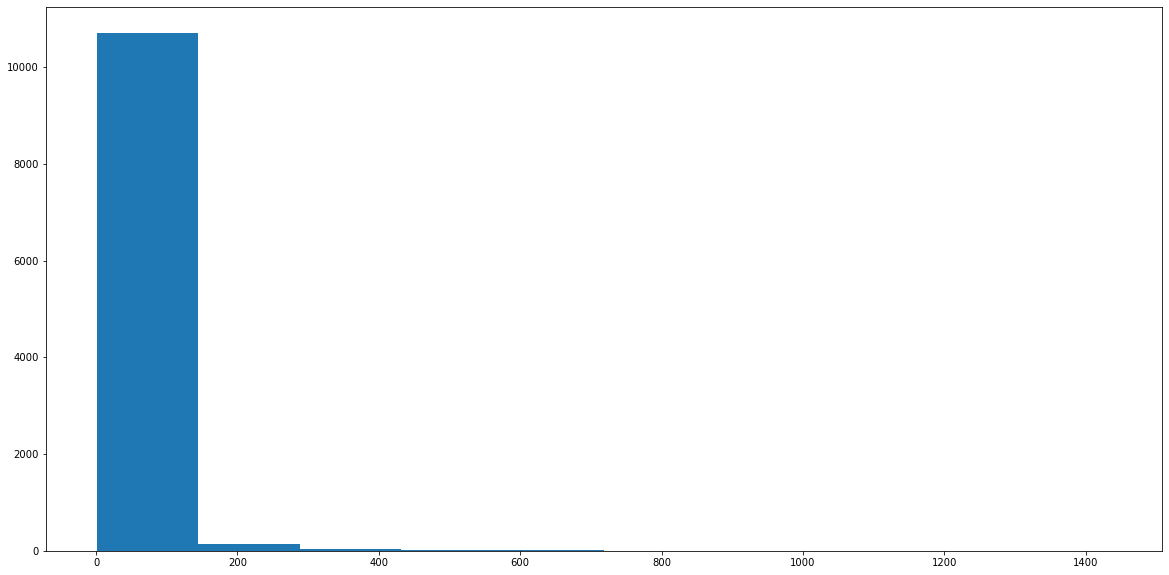

In [383]:
plt.figure(figsize=(20,10))
plt.hist(artist_class_count_df['Class Count'])
plt.show()
# Most below 150

In [384]:
artist_class_count_zoom = artist_class_count_df[artist_class_count_df['Class Count'] <= 300]

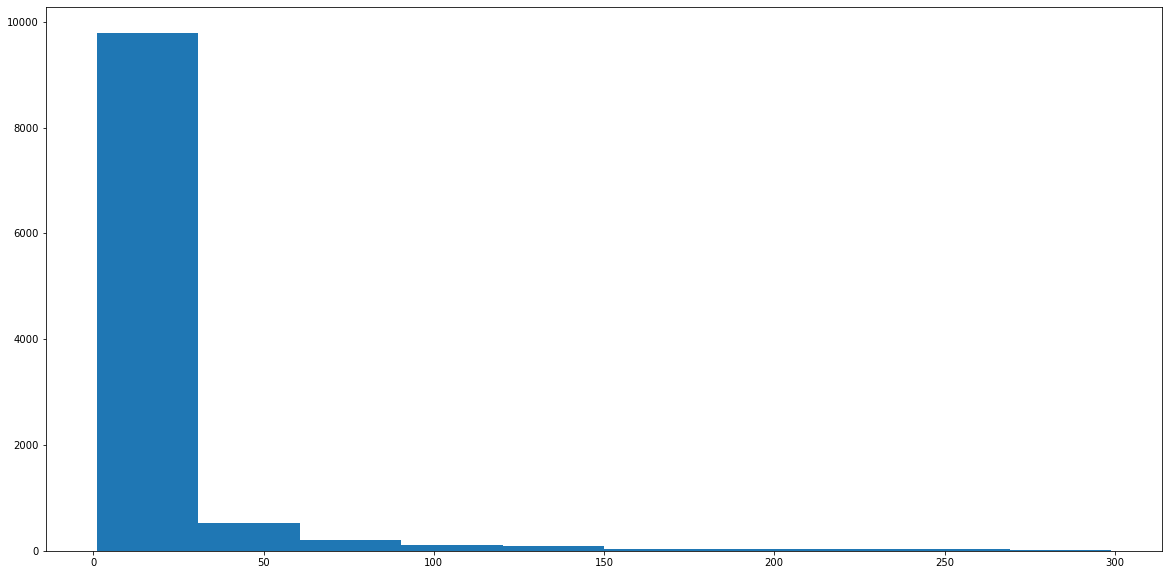

In [385]:
plt.figure(figsize=(20,10))
plt.hist(artist_class_count_zoom['Class Count'])
plt.show()
# most below 25

In [386]:
artist_class_count_high = artist_class_count_df[artist_class_count_df['Class Count'] > 300]
len(artist_class_count_high)
# 80 = .007% of all artists are used in over 300 current classes

80

In [387]:
df_bool_equip['classType'].value_counts()
# Could categorize these to Cardio, Strength, Stretching, Meditation
# Bootcamps would be both Cardio and Strength
# Yoga would be Stretching and Strength
# Cardio: Cardio, Cycling, Running, Tread Bootcamp, Bike Bootcamp, Walking (10,727)
# Strength: Strength, Tread Bootcamp, Bike Bootcamp, Yoga (5,030)
# Stretching: Stretching, Yoga (2,886)
# Meditation: Meditation (1,166, or drop this because music and meditation aren't the focus)

Cycling           7410
Yoga              2317
Running           1982
Strength          1970
Meditation        1165
Tread Bootcamp     685
Stretching         569
Walking            414
Cardio             178
Bike Bootcamp       58
Name: classType, dtype: int64

#### Create df for classType - different categorization that could aid in tying to music data

In [388]:
# # Establish variable for Series
# class_type_reorg = df['classType']

# class_type_list = ['Cardio', 'Strength', 'Stretching', 'Meditation']

In [389]:
# # Define a new DataFrame for class_type to add Boolean columns to
# class_type_reorg_df = pd.DataFrame(df[['classId','classType']])

In [390]:
# # Use for loop to create columns for each genre in the deduplicated set of genres for the genres_list
# for new_type in class_type_list:
#     #create a new column in our new DataFrame
#     class_type_reorg_df[new_type] = 0

In [391]:
# class_type_reorg_df

In [392]:
# cardio_type = ['Cardio', 'Cycling', 'Running', 'Tread Bootcamp', 'Bike Bootcamp', 'Walking']
# strength_type = ['Strength', 'Tread Bootcamp', 'Bike Bootcamp', 'Yoga']
# stretching_type = ['Stretching', 'Yoga']


# for row in class_type_reorg_df.index:
#     if class_type_reorg_df['classType'][row] in cardio_type:
#         class_type_reorg_df['Cardio'][row] = 1
#     if class_type_reorg_df['classType'][row] in strength_type:
#         class_type_reorg_df['Strength'][row] = 1
#     if class_type_reorg_df['classType'][row] in stretching_type:
#         class_type_reorg_df['Stretching'][row] = 1
#     elif class_type_reorg_df['classType'][row] == 'Meditation':
#         class_type_reorg_df['Meditation'][row] = 1

In [393]:
# class_type_reorg_df

In [394]:
# # pickle df - done
# class_type_reorg_df.to_pickle("./class_type_reorg_df.pkl")

In [395]:
# Bring in class_type_reorg_df without processing time
class_type_reorg_df = pd.read_pickle("./class_type_reorg_df.pkl")

#### Merge classType reorg df with df_bool_equip

In [396]:
# Same DataFrame length, merge on classId
df_bool_type_equip = df_bool_equip.merge(class_type_reorg_df, on='classId',how='inner', left_index=True, right_index=True)
df_bool_type_equip

,classId,className,classDescription,classDifficulty,classDuration,classType_x,classLength,classLocation,classOriginalAirdate,classRating,...,Yoga Block,Workout Mat,Medium Weights,Yoga Strap,Heavy Weights,classType_y,Cardio,Strength,Stretching,Meditation
0,7f66378211c9476b9b5619bf989f91d0,20 min Peace Meditation,A guided meditation that focuses on cultivatin...,4.3333,20,Meditation,23,psny-studio-2,2021-09-03 13:25:00,0.9847,...,1,0,0,0,0,Meditation,0,0,0,1
1,54ac61803b364b2fa8378acd9f593cdb,15 min Bodyweight Strength,"No equipment, no problem. Join us for a high-e...",5.7755,15,Strength,19,psny-studio-3,2021-09-03 13:19:00,0.9933,...,0,1,0,0,0,Strength,0,1,0,0
2,c75fd4831573483c9d45739aae11d083,20 min Focus Flow: Lower Body,This yoga flow class focuses on poses that eng...,4.3664,20,Yoga,23,psny-studio-2,2021-09-03 12:51:00,1.0000,...,1,0,0,0,0,Yoga,0,1,1,0
3,470086936f7a4723ab5a53cb80b571ff,45 min Pop Bootcamp,Split your workout 50/50 between cardio on the...,7.8312,45,Tread Bootcamp,50,psny-studio-4,2021-09-03 11:56:00,0.9737,...,0,1,1,0,0,Tread Bootcamp,1,1,0,0
4,9680a817bf2149d2b91990c87166a400,20 min Pop Ride,We dare you not to dance as you ride to all th...,7.4000,20,Cycling,24,uk,2021-09-03 07:52:00,1.0000,...,0,0,0,0,0,Cycling,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16743,a144fcf1595740caa610f6484deb3cdb,20 min Funk Fun Run,This 20 minute Fun Run is a musically driven c...,6.4567,20,Running,23,nyc-gw-tread,14/09/2018 10:22,0.9933,...,0,0,0,0,0,Running,1,0,0,0
16744,bd89a56c884b48e59ce9c43ab4f4d86f,45 min 90s Pop Ride,The 90s were a booming and inventive time in m...,8.1481,45,Cycling,49,nyc,13/09/2018 23:19,0.9925,...,0,0,0,0,0,Cycling,1,0,0,0
16745,e5a99c83d7fc4f0686c68b02e5932204,10 min Arms Toning,Join Jess as she takes you through this 10-min...,7.4028,10,Strength,11,nyc,13/09/2018 21:02,0.9978,...,0,0,0,0,0,Strength,0,1,0,0
16746,c57e123004d04df1bfae94c5e4399bb3,45 min 90s Ride,The 90s were a booming and inventive time in m...,8.3982,45,Cycling,49,nyc,13/09/2018 11:53,0.9922,...,0,0,0,0,0,Cycling,1,0,0,0


In [397]:
# Drop classEquipment_y, rename classEquipment_x back to classEquipment_
df_bool_type_equip = df_bool_type_equip.drop(columns=['classType_y'])
df_bool_type_equip.rename(columns = {'classType_x':'classType'}, inplace = True)

In [398]:
# Review df
df_bool_type_equip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16748 entries, 0 to 16747
Data columns (total 32 columns):
classId                 16748 non-null object
className               16748 non-null object
classDescription        16748 non-null object
classDifficulty         16748 non-null float64
classDuration           16748 non-null int64
classType               16748 non-null object
classLength             16748 non-null int64
classLocation           16748 non-null object
classOriginalAirdate    16748 non-null object
classRating             16748 non-null float64
classRatingCount        16748 non-null int64
instructorName          16748 non-null object
instructorBio           16748 non-null object
classEquipment          16748 non-null object
classSongs              16748 non-null object
classArtists            16748 non-null object
classUrl                16748 non-null object
Resistance Band         16748 non-null int64
Bolster                 16748 non-null int64
Bike                

#### Try merging artists boolean df with new class types - bring in class id, instructorName

In [399]:
# id_teach_type_df = df_bool_type_equip[['classId', 'instructorName', 'classType', 'Cardio', 'Strength', 'Stretching', 'Meditation']]
# id_teach_type_df.head()

In [400]:
# # Same DataFrame length, merge with artist_df on indices
# new_class_types_with_artists = id_teach_type_df.merge(artist_df, left_index=True, right_index=True)
# new_class_types_with_artists
# # Meditation_x is new class type
# # Meditation_y would be artist

In [401]:
# # pickle df - done
# new_class_types_with_artists.to_pickle("./new_class_types_with_artists.pkl")

In [402]:
# Bring in class_type_reorg_df without processing time
new_class_types_with_artists = pd.read_pickle("./new_class_types_with_artists.pkl")

#### Curious questions
1. Which instructor has the most varied artists?
2. Which instructor has the least varied artists?
3. What about genres represented? per instructor/per class type?
4. What TYPE of class has the most varied and least varied artists?

#### Need to find classSong that is a float and scrub, then can create list with code module below

In [403]:
df_bool_type_equip['classSongs']

0                                          [Meditation 22]
1        [California Gurls, Let's Get Loud, Let It Rock...
2        [Interlude No 1, Oceansize, She Just Likes To ...
3        [34+35 (Remix) (feat. Doja Cat & Megan Thee St...
4        [Señorita, Marry You, Irreplaceable, What Do Y...
                               ...                        
16743    [Man Funk (feat. Leron Thomas), If It Ain't Fu...
16744    [Too Close - Radio Edit, Motownphilly - Origin...
16745    [Hustle, Day and Night, Just Got Paid, Waiting...
16746    [Show Me Love - Radio Version, Don't Speak, Go...
16747    [Together - Oliver Nelson Remix, Control (feat...
Name: classSongs, Length: 16748, dtype: object

In [404]:
# Establish variable for Series
class_songs = df_bool_type_equip['classSongs']

In [405]:
# Check for floats
# Previously an error because a row value in classSongs was a float (id referenced earlier in notebook)
for row in class_songs:
    if (type(row) == list):
        continue
    else:
        print(type(row))

In [406]:
df_bool_type_equip

,classId,className,classDescription,classDifficulty,classDuration,classType,classLength,classLocation,classOriginalAirdate,classRating,...,Light Weights,Yoga Block,Workout Mat,Medium Weights,Yoga Strap,Heavy Weights,Cardio,Strength,Stretching,Meditation
0,7f66378211c9476b9b5619bf989f91d0,20 min Peace Meditation,A guided meditation that focuses on cultivatin...,4.3333,20,Meditation,23,psny-studio-2,2021-09-03 13:25:00,0.9847,...,0,1,0,0,0,0,0,0,0,1
1,54ac61803b364b2fa8378acd9f593cdb,15 min Bodyweight Strength,"No equipment, no problem. Join us for a high-e...",5.7755,15,Strength,19,psny-studio-3,2021-09-03 13:19:00,0.9933,...,0,0,1,0,0,0,0,1,0,0
2,c75fd4831573483c9d45739aae11d083,20 min Focus Flow: Lower Body,This yoga flow class focuses on poses that eng...,4.3664,20,Yoga,23,psny-studio-2,2021-09-03 12:51:00,1.0000,...,0,1,0,0,0,0,0,1,1,0
3,470086936f7a4723ab5a53cb80b571ff,45 min Pop Bootcamp,Split your workout 50/50 between cardio on the...,7.8312,45,Tread Bootcamp,50,psny-studio-4,2021-09-03 11:56:00,0.9737,...,0,0,1,1,0,0,1,1,0,0
4,9680a817bf2149d2b91990c87166a400,20 min Pop Ride,We dare you not to dance as you ride to all th...,7.4000,20,Cycling,24,uk,2021-09-03 07:52:00,1.0000,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16743,a144fcf1595740caa610f6484deb3cdb,20 min Funk Fun Run,This 20 minute Fun Run is a musically driven c...,6.4567,20,Running,23,nyc-gw-tread,14/09/2018 10:22,0.9933,...,0,0,0,0,0,0,1,0,0,0
16744,bd89a56c884b48e59ce9c43ab4f4d86f,45 min 90s Pop Ride,The 90s were a booming and inventive time in m...,8.1481,45,Cycling,49,nyc,13/09/2018 23:19,0.9925,...,1,0,0,0,0,0,1,0,0,0
16745,e5a99c83d7fc4f0686c68b02e5932204,10 min Arms Toning,Join Jess as she takes you through this 10-min...,7.4028,10,Strength,11,nyc,13/09/2018 21:02,0.9978,...,1,0,0,0,0,0,0,1,0,0
16746,c57e123004d04df1bfae94c5e4399bb3,45 min 90s Ride,The 90s were a booming and inventive time in m...,8.3982,45,Cycling,49,nyc,13/09/2018 11:53,0.9922,...,1,0,0,0,0,0,1,0,0,0


In [407]:
class_songs = df_bool_type_equip['classSongs']

In [408]:
# Establish empty list to collect all possible songs
song_list = []

# Start with rows in index
for row in class_songs.index:
    # Access the list data type in each row, it will change with every row in the index
    for song in class_songs[row]:
        # append the eqiupment that is taken as an item from the list within the row and add it to the equipment_list
        song_list.append(song) 

# Define a set of the equipment_list from the above for loop; reassign the genres_list variable name to this set
class_song_list = set(song_list)

In [409]:
len(class_song_list)

29904

In [410]:
class_song_list

{'',
 'Weekend',
 'Supalonely (feat. Gus Dapperton)',
 'Play (Artful Dodger Mix - Main Mix Radio)',
 'Light Your Ass On Fire (Club Mix) (feat. Pharrell)',
 'Moon and Star',
 "Let's Stay Together - 2015 Remastered Version",
 'There for You feat. Effie (Crush Club Remix)',
 'I Feel for You (Axwell Remix)',
 'I Like It - Dillon Francis Remix',
 'Din Daa Daa',
 'Beardo (Radio Edit)',
 'Ready For Your Love (CLOSE Ready For Your Dub) (feat. MNEK)',
 'New Life',
 'Charlene',
 "When It's Over (Remastered)",
 'Mullholland',
 'So What!',
 'Lose Sight',
 'O-H-I-O',
 'Piano Sonata No. 14 in C sharp minor',
 'Get Off Of My Cloud ((Original Single Mono Version))',
 'Turn The Light',
 'Another Brick in the Wall',
 ' Baby (Single Version)',
 'CoCo (MAKJ Remix)',
 'Get It Off (That Kid Chris Edit)',
 'Good Together - Alex Metric Remix',
 'Strawberry Swing',
 'Big Gucci',
 'Back From Hell (Remix)',
 'Summertime Sadness [Lana Del Rey vs. Cedric Gervais] - Cedric Gervais Remix',
 'I Will Survive (Album Ve

Below takes a 10 mins - 30k songs

In [411]:
# # Define a new DataFrame for songs to add Boolean columns to
# songs_df = pd.DataFrame(df_bool_type_equip[['classId','classSongs']])

In [412]:
# # Use for loop to create columns for each song in the deduplicated set of songs
# for song in class_song_list:
#     #create a new column in our new DataFrame
#     songs_df[song] = 0

In [413]:
# songs_df

In [414]:
# for row in songs_df.index:
#     # Using previous for loop, edit it to access our new DF's column 'genres' THEN the row
#     # This will get us to the list of genres in the given row
#     for song in songs_df['classSongs'][row]:
#         # Then say access the column that matches single genre in that list of genres (item) in that row (row)
#         songs_df[song][row] = 1

In [415]:
# songs_df

In [416]:
# # pickle df - done
# songs_df.to_pickle("./songs_df.pkl")

In [417]:
# Bring in songs_df without processing time
songs_df = pd.read_pickle("./songs_df.pkl")

Create dictionary with song count

In [418]:
# # Create dictionary using for loop to grab column name as the dict key and sum of each column as dict value
# song_total_dict = {}

# for song in class_song_list:
#     song_total_dict[song] = songs_df[song].sum()
    
# song_total_dict

In [419]:
# # Sort the dictionary
# sorted_song_total_dict = dict(sorted(song_total_dict.items(), key=operator.itemgetter(1),reverse=True))
# sorted_song_total_dict

In [420]:
# # Convert dictionary to dataframe
# song_class_count_df = pd.DataFrame(list(song_total_dict.items()),columns = ['Artist','Class Count'])
# song_class_count_df.head()

In [421]:
# # pickle df - done
# song_class_count_df.to_pickle("./song_class_count_df.pkl")

In [423]:
# Bring in songs_df without processing time
song_class_count_df = pd.read_pickle("./song_class_count_df.pkl")

In [424]:
song_class_count_df.describe()
# 75% of songs used in 4 or less classes
# Clear outliers in max - some songs used in 250+ classes

,Class Count
count,29904.000000
mean,4.407671
std,8.500471
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,269.000000


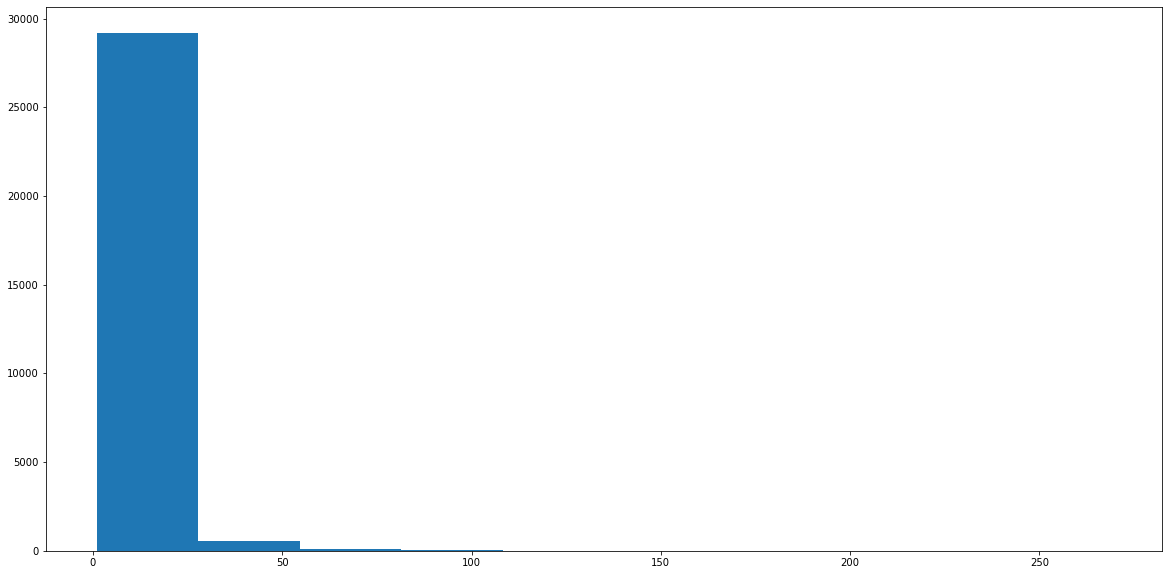

In [425]:
plt.figure(figsize=(20,10))
plt.hist(song_class_count_df['Class Count'])
plt.show()
# Most below 60

In [426]:
song_class_count_zoom = song_class_count_df[song_class_count_df['Class Count'] <= 60]

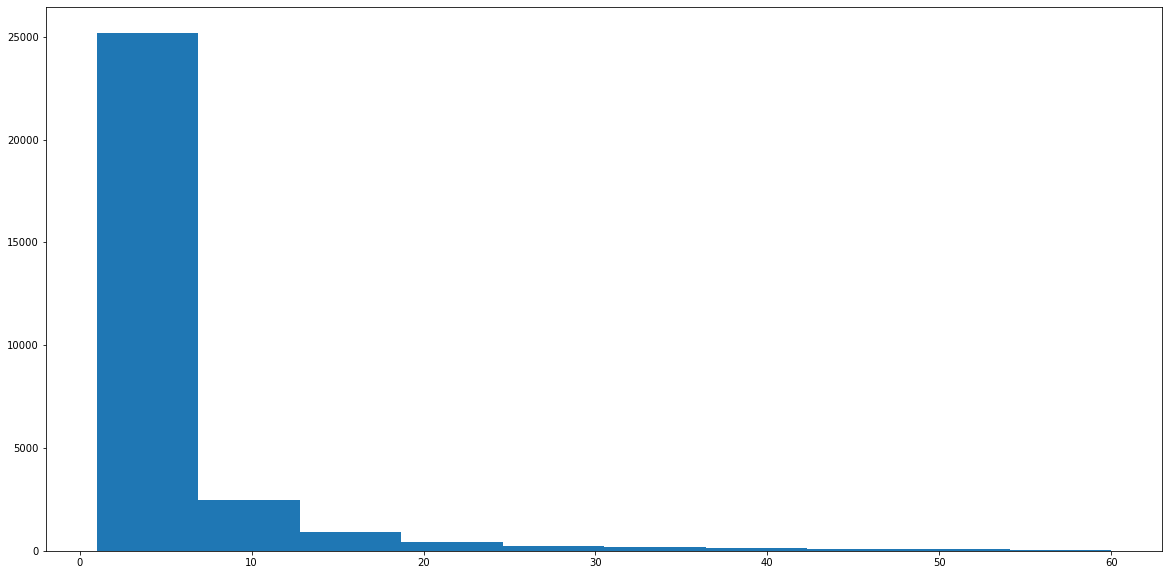

In [427]:
plt.figure(figsize=(20,10))
plt.hist(song_class_count_zoom['Class Count'])
plt.show()
# most below 5